**Dataset Creation**

In [ ]:
#Importing necessary libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
#Converting the video to frames
!ffmpeg -i "/content/drive/MyDrive/Deep Learning/ds1.mp4" -vf fps=30 "/content/drive/MyDrive/Deep Learning/ds/z%d.png"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

(1080, 1920, 3)


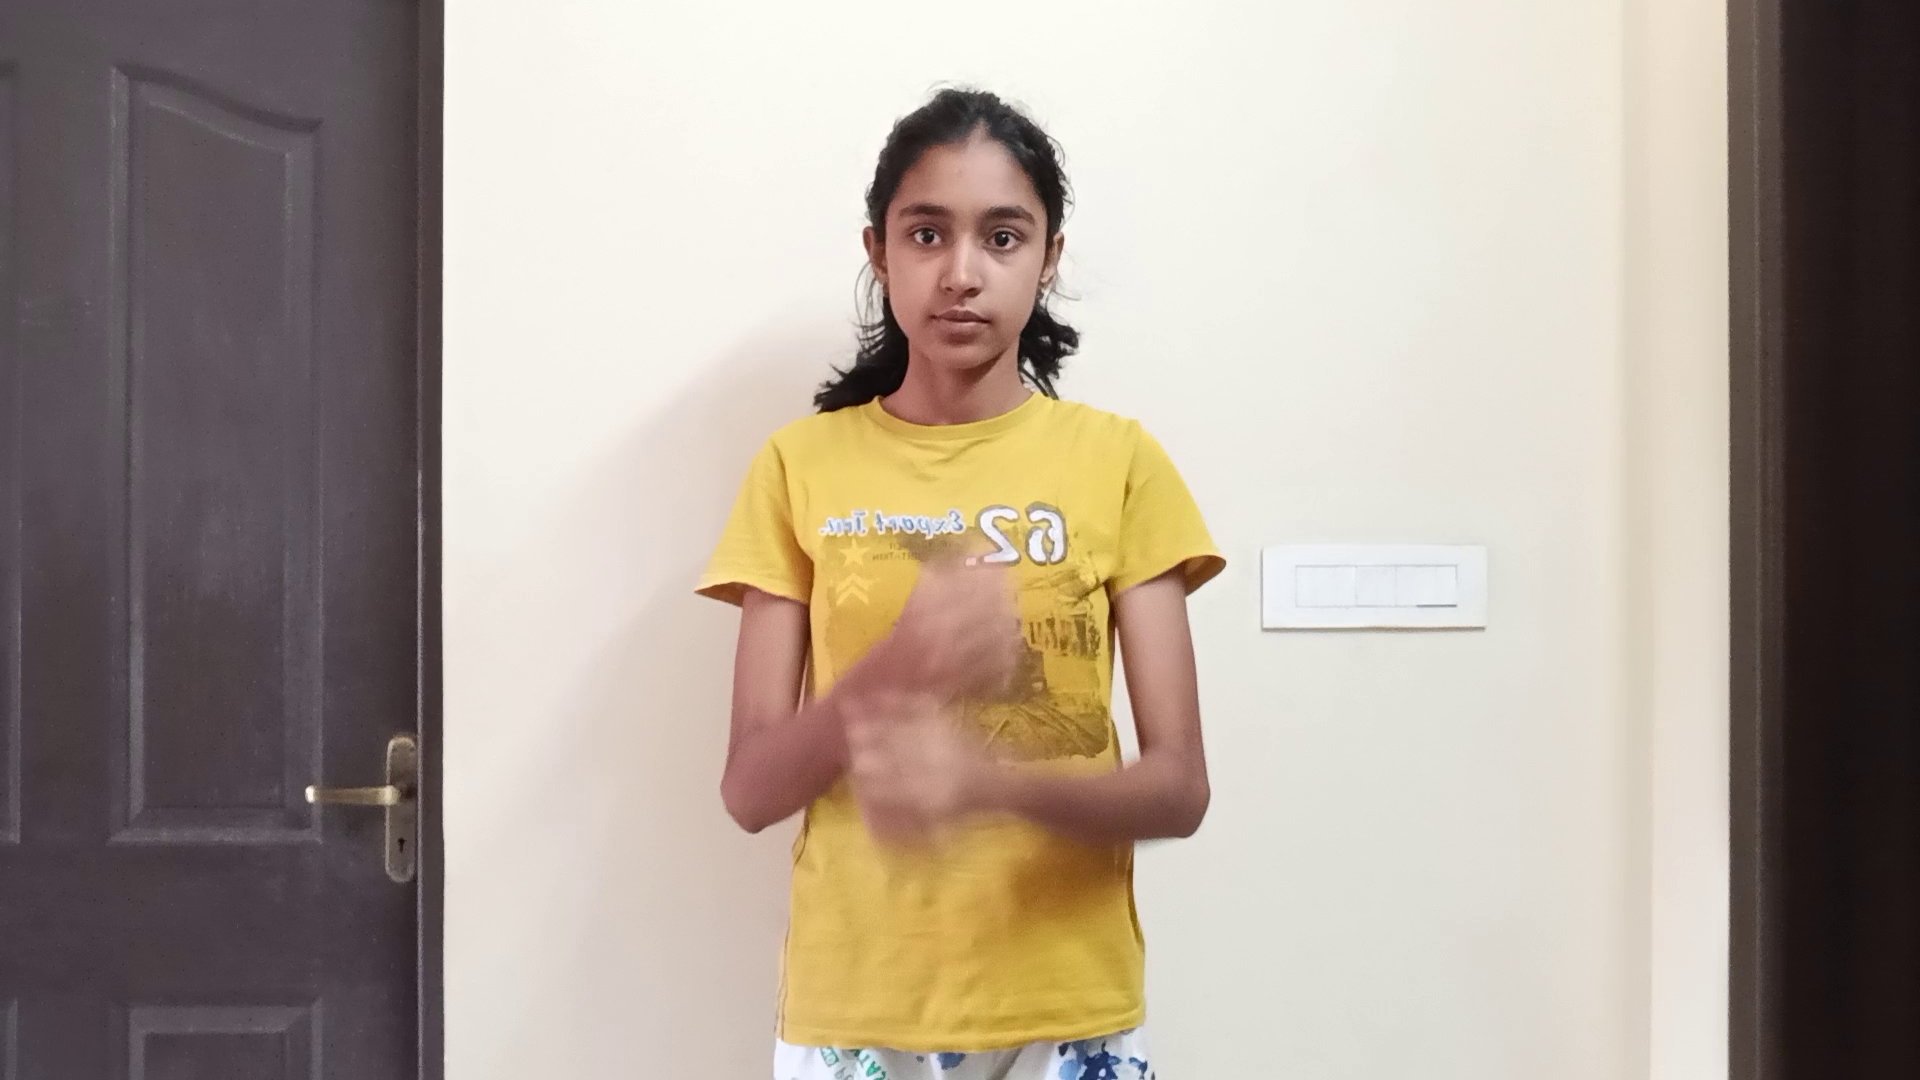

In [ ]:
image_1 = cv2.imread("/content/drive/MyDrive/Deep Learning/ds/z10.png")
print(image_1.shape)
cv2_imshow(image_1)

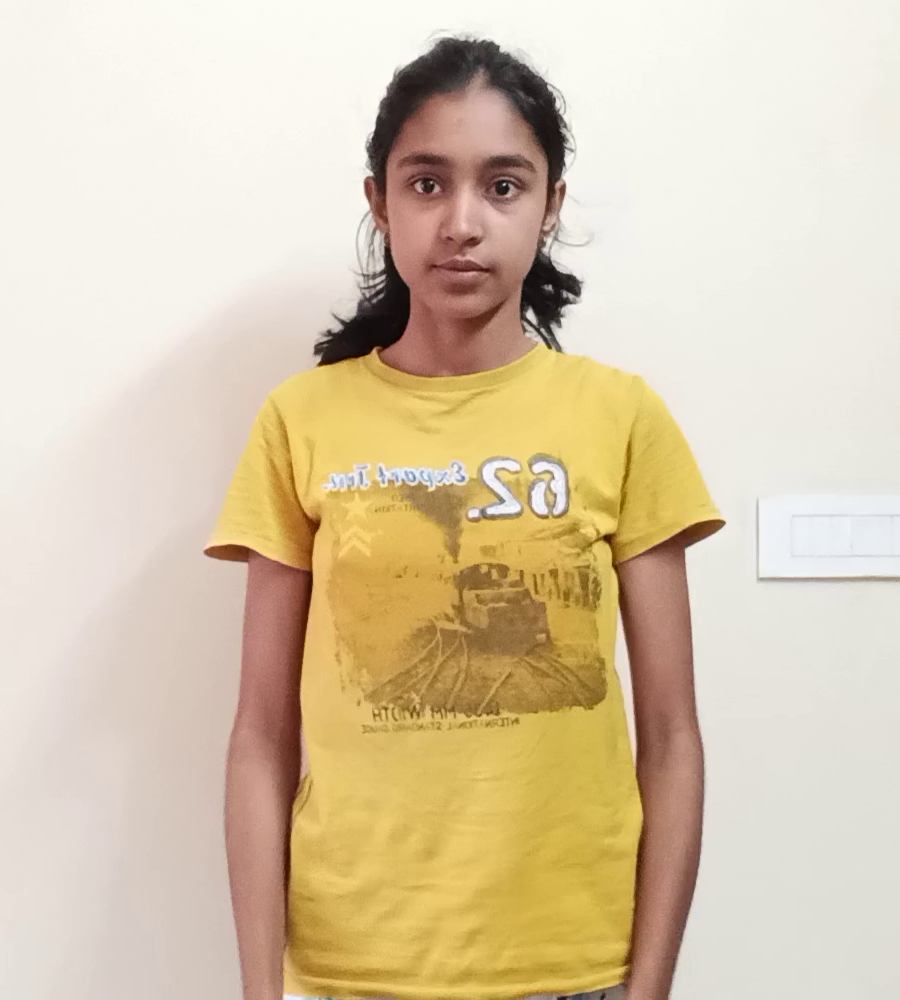

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Deep Learning/ds/z1.png".format(20))
image_crp = image[50:1050,500:1400]
cv2_imshow(image_crp)

In [ ]:
#Cropping the image
frame_dir = r"/content/drive/MyDrive/Deep Learning/ds"
output_dir = "/content/drive/MyDrive/Deep Learning/ds"
for i in range(len(os.listdir(frame_dir))):
  image = cv2.imread(f"/content/drive/MyDrive/Deep Learning/ds/z{i}.png".format(i))
  image_crp = image[50:1050,500:1400]
  image_resize = cv2.resize(image_crp,(256,256))
  cv2.imwrite(f'/content/drive/MyDrive/Deep Learning/ds/z{i}.png'.format(i),image_resize)

In [ ]:
#Resizing the image
path="/content/drive/MyDrive/Deep Learning/ds"
i=0
for filename in os.listdir(path):
  
  img = cv2.imread(os.path.join("/content/drive/MyDrive/Deep Learning/ds",filename))
  img_crp =img[50:1050,500:1400] # we are using array indexing to crop an image

  img_resize = cv2.resize(img_crp,(256,256))
  
  cv2.imwrite(f"/content/drive/MyDrive/Deep Learning/ds/z{i}.png".format(i),img_resize)
  i=i+1

In [ ]:
#Converting to Gray scale
path="/content/drive/MyDrive/Deep Learning/ds"
i=0
for filename in os.listdir(path):
    image = cv2.imread(os.path.join("/content/drive/MyDrive/Deep Learning/ds",filename))
    image_b_w = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    cv2.imwrite(f"/content/drive/MyDrive/Deep Learning/ds/z{i}.png".format(i),image_b_w)
    i=i+1

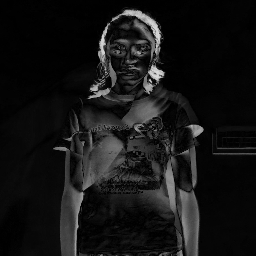

In [ ]:
#Taking absolute difference of images
image_1 = cv2.imread("/content/drive/MyDrive/Deep Learning/ds/z1000.png")
image_2 = cv2.imread("/content/drive/MyDrive/Deep Learning/ds/z12.png")

image_1_b_w = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY )
image_2_b_w = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY )

absdiff = cv2.absdiff(image_1_b_w,image_2_b_w)

cv2_imshow(absdiff)


In [ ]:
frame_dir = r"/content/drive/MyDrive/Deep Learning/ds"
print(len(os.listdir(frame_dir)))
for i in range(1,len(os.listdir(frame_dir))):

  image_1 = cv2.imread(r"/content/drive/MyDrive/Deep Learning/ds/z{}.png".format(i))
  image_2 = cv2.imread(r"/content/drive/MyDrive/Deep Learning/ds/z{}.png".format(i+1))

  image_1_b_w = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY )
  image_2_b_w = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY )

  absdiff = cv2.absdiff(image_1_b_w,image_2_b_w)
  cv2.imwrite(r'/content/drive/MyDrive/Deep Learning/ds/z{}.png'.format(i),absdiff)

  #cv2_imshow(absdiff)

**Data Augmentation**

In [ ]:
#Rotate images
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result
print(image_1.shape)

(256, 256, 3)


In [ ]:
frame_dir = r"/content/drive/MyDrive/Deep Learning/ds"
import random

print(random.randint(0,9))
for i in range(1,len(os.listdir(frame_dir)),20):
  img = cv2.imread("/content/drive/MyDrive/Deep Learning/ds/z{}.png".format(i))
  image_rot = rotate_image(img,(random.randint(-25,25)))
  print("ran",random.randint(-25,25))
  cv2.imwrite(r'/content/drive/MyDrive/Deep Learning/ds/z{}.png'.format(len(os.listdir(frame_dir))+1),image_rot)

5
1
ran -11
21
ran -8
41
ran 6
61
ran 3
81
ran -7
101
ran 24
121
ran 1
141
ran 17
161
ran -13
181
ran 17
201
ran 16
221
ran -25
241
ran 7
261
ran -8
281
ran 7
301
ran -9
321
ran 4
341
ran 10
361
ran 2
381
ran 17
401
ran 13
421
ran -25
441
ran 14
461
ran -13
481
ran 12
501
ran -25
521
ran 12
541
ran -4
561
ran -12
581
ran -15
601
ran 2
621
ran -18
641
ran -24
661
ran -18
681
ran -13
701
ran -20
721
ran 21
741
ran -25
761
ran -2
781
ran -10
801
ran -4
821
ran -25
841
ran -1
861
ran -14
881
ran 3
901
ran 19
921
ran 12
941
ran -19
961
ran 22
981
ran -23
1001
ran 23
1021
ran -25
1041
ran 1
1061
ran -7
1081
ran 10
1101
ran 14
1121
ran -25
1141
ran 22
1161
ran -22
1181
ran 20
1201
ran -15
1221
ran -21
1241
ran 9
1261
ran 18
1281
ran 17
1301
ran 24
1321
ran -12
1341
ran 15
1361
ran 0
1381
ran 4
1401
ran -19
1421
ran 25
1441
ran 16
1461
ran -19
1481
ran -9
1501
ran 5
1521
ran 5
1541
ran -24
1561
ran 10
1581
ran 13
1601
ran 24
1621
ran -4
1641
ran 23
1661
ran 21
1681
ran 25
1701
ran -11
1721
ran

In [ ]:
#Flip images
def flip_images(): 
  path="/content/drive/MyDrive/Deep Learning/ds"
  sampl = np.random.uniform(low=0, high=893, size=(200,))
  sampl=sampl.astype(int)
  for i in sampl:
      z=0
      image= cv2.imread(f"/content/drive/MyDrive/Deep Learning/ds/z{i}.png".format(i))
      image_flip = cv2.flip(image,3)
      cv2.imwrite(f"/content/drive/MyDrive/Deep Learning/ds/z{len(os.listdir(path))+z}.png".format(z),image_flip)
      z=z+1

In [ ]:
flip_images()